In [ ]:
Submission By: 
    Name: Kalaiarasi Sargunaraj 
    Student Number: 17200399
        
    Name: Parkavi Kolandavel Mani
    Student Number: 18200072
        

In [2]:
import urllib.request
import pandas as pd
import csv
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.mode.chained_assignment=None

The APIs that was chosen for this assignment expose Police Department Incident Reports of San Francisco government. The data is hosted by https://data.sfgov.org.
API for Incidents from 2018 – Present: https://data.sfgov.org/resource/nwbb-fxkq.csv 
API for Incidents in 2018: https://data.sfgov.org/resource/cuks-n6tp.csv 
These APIs provide CSV data.

In [3]:
#This method calls the url passed as an argument and returns a response
#A failure message is returned if the call was unsuccessful 
def callAPI(url):
    try:
        response = pd.read_csv(url)
        return response
    except:
        return "Failed to retrieve %s" % url
    

In [4]:
#Function to save a file in a specific location
def save_file(file, location):
    file.to_csv(location)

In [5]:
#url to fetch the Police Incident call details from 2018
incident_2018_url = "https://data.sfgov.org/resource/cuks-n6tp.csv"
#url to fetch the Police Incident call details from 2018 to 2019
incident_2019_url = "https://data.sfgov.org/resource/nwbb-fxkq.csv"
#calling the API to fetch data
incident_2018_response = callAPI(incident_2018_url)
incident_2019_response = callAPI(incident_2019_url)
#Selecting only the features required to analyse the datasets and storing them in a dataframe
incidents_18_df = incident_2018_response[["category","dayofweek","resolution","date"]]
incidents_19_df = incident_2019_response[["incident_category","incident_day_of_week","resolution","incident_date"]]
#saving the datasets locally in CSV format
save_file(incidents_18_df, "incidents_18.csv")
save_file(incidents_19_df, "incidents_19.csv")

We have integrated the datasets received from both the APIs. During that process, we have resolved conflicts in feature values – values that are equivalent but had different representations. We have resolved the conflicts by modifying such feature values to have same representation in both the datasets. 

In [6]:
#This maps the conflicted values and the values they should be replaced with for the 'resolution' column
resolution_conflicts = {
    "Cite or Arrest Adult":"ARREST, BOOKED",
    "Cite or Arrest Juvenile":"JUVENILE BOOKED",
    "Exceptional Adult":"EXCEPTIONAL CLEARANCE",
    "Exceptional Juvenile":"EXCEPTIONAL CLEARANCE",
    "Open or Active":"NONE",
    "Unfounded":"NONE"
    }
#This maps the conflicted values and the values they should be replaced with for the 'category' column
category_conflicts = {
    "Drug Offense":"DRUG/NARCOTIC",
    "Family Offense":"FAMILY OFFENSES",
    "Forgery And Counterfeiting":"FORGERY/COUNTERFEITING",
    "Larceny Theft":"LARCENY/THEFT",
    "Sex Offense":"SEX OFFENSES, FORCIBLE",
    "Motor Vehicle Theft":"VEHICLE THEFT",
    "Warrant":"WARRANTS",
    "Weapons Carrying Etc":"WEAPON LAWS",
    "Weapons Offense":"WEAPON LAWS"
}

In [12]:
#Iterating through the maps and updating the values in data from second API(2019 incident call information) to resolve value conflicts with data from first API(2018 incident call information)
for conflict, resolution in resolution_conflicts.items():
    incidents_19_df["resolution"] = incidents_19_df["resolution"].replace(conflict, resolution)
    incidents_19_df.to_csv('incidents_18_resolution_resolv.csv')
    
for conflict, category in category_conflicts.items():
    incidents_19_df["incident_category"] = incidents_19_df["incident_category"].replace(conflict, category)
    incidents_19_df["incident_category"] = incidents_19_df["incident_category"].str.upper()

In [13]:
#The feature key for Incident date is different in both the data sets
#The dates has been converted from string to datetime format
incidents_18_df["date"] = pd.to_datetime(incidents_18_df["date"])
incidents_19_df["incident_date"] = pd.to_datetime(incidents_19_df["incident_date"])

In [15]:
#Now that the conflicts have been resolved and necessary formatting has been done, we have integrated both
#datasets by concatenating and storing them in a single dataframe
integrated_df = pd.concat([incidents_18_df,incidents_18_df.rename(columns={'incident_category':'category','incident_day_of_week':'dayofweek','incident_date':'date'})], ignore_index=True)
integrated_df.to_csv('df_merge.csv')

In [16]:
#Printing 10 records from the integrated dataframe
print(integrated_df[:10])

         category dayofweek      resolution       date
0   VEHICLE THEFT   Tuesday            NONE 2018-05-15
1    NON-CRIMINAL   Tuesday            NONE 2018-05-15
2  OTHER OFFENSES   Tuesday  ARREST, BOOKED 2018-05-15
3  OTHER OFFENSES   Tuesday  ARREST, BOOKED 2018-05-15
4  OTHER OFFENSES   Tuesday  ARREST, BOOKED 2018-05-15
5  OTHER OFFENSES   Tuesday            NONE 2018-05-15
6   DRUG/NARCOTIC   Tuesday  ARREST, BOOKED 2018-05-15
7         ROBBERY   Tuesday  ARREST, BOOKED 2018-05-15
8        WARRANTS   Tuesday  ARREST, BOOKED 2018-05-15
9     LIQUOR LAWS   Tuesday  ARREST, BOOKED 2018-05-15


In [17]:
#As part of Data cleaning, checking if there are any missing values. There were none. 
integrated_df.isnull().sum()

category      0
dayofweek     0
resolution    0
date          0
dtype: int64

Plotting the top 10 crimes from the integrated dataset which contains the Incident calls from 2018 and 2019

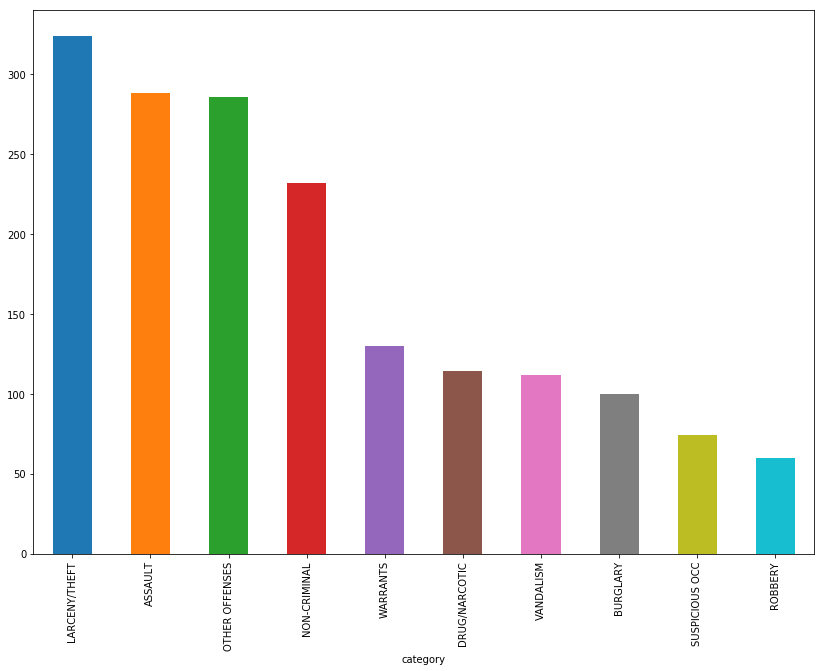

In [18]:
#yearly = integrated_df.groupby([pd.Grouper(key='date',freq='Y'),'category'])
yearly = integrated_df.groupby('category')
(yearly.size()).sort_values(ascending=False).head(10).plot(kind='bar',figsize=(14,10))

Plotting the summary of Incident resolutions from the Integrated dataset

resolution
ARREST, BOOKED            806
EXCEPTIONAL CLEARANCE       2
JUVENILE BOOKED             6
NONE                     1186
dtype: int64


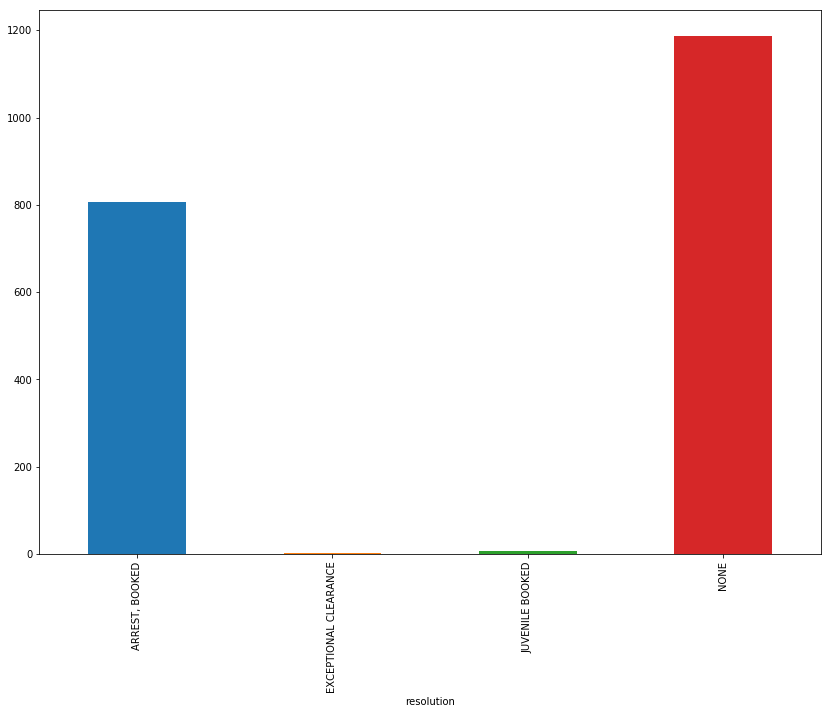

In [19]:
resolution = integrated_df.groupby('resolution')
#printing the count of each Incident resolutions
print(resolution.size())
resolution.size().plot(kind='bar',figsize=(14,10))

Tentative Conclusion:
    Analysing the datasets, we found that the most reported crime in the last two years in the state of San Francisco is Larceny/Theft followed by Assault. It has also been observed that majority of the reported incidents have not been resolved yet. 